<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/7/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://www.takapy.work/entry/2019/02/08/002738

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# データの読み込み
cancer = load_breast_cancer()
X_df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
X_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = cancer.target

In [4]:
# 分散：１にスケーリング
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(data=X_scaled,columns=cancer.feature_names)

In [5]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

# 訓練用と検証用に分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=0, test_size=0.3)

# ロジスティック回帰で学習
lr = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000)
y_train=y_train.reshape(-1)
lr.fit(X_train, y_train)

# 検証
print('Train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=lr.predict(X_test))))

Train score: 0.987
Test score: 0.977
Confustion matrix:
[[ 60   3]
 [  1 107]]


<BarContainer object of 30 artists>

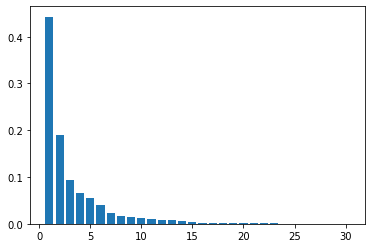

In [6]:
from sklearn.decomposition import PCA

# 元の特徴量と同じ数で主成分分析
pca = PCA(n_components=30)
pca.fit(X_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [7]:
# 寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.44272 0.18971 0.09393 0.06602 0.05496 0.04025 0.02251 0.01589 0.0139
 0.01169 0.0098  0.00871 0.00805 0.00523 0.00314 0.00266 0.00198 0.00175
 0.00165 0.00104 0.001   0.00091 0.00081 0.0006  0.00052 0.00027 0.00023
 0.00005 0.00002 0.     ]
